# EDA

we’ll analyze the distribution of images across the five classes (1 to 5 objects in a bin) and visualize this distribution using a bar chart. Additionally, we will calculate the total number of images used in the dataset.

## Step 1: Load and Parse `file_list.json`

First, we’ll load the file_list.json file, which contains the mapping of classes (number of objects) to the corresponding image files.

In [1]:
import json
import os
import matplotlib.pyplot as plt

# Load file_list.json
with open('file_list.json', 'r') as f:
    data = json.load(f)

# Calculate the number of images per class
class_counts = {k: len(v) for k, v in data.items()}

# Display the class distribution
print("Number of images per class:")
for class_name, count in class_counts.items():
    print(f"Class {class_name}: {count} images")

# Calculate the total number of images
total_images = sum(class_counts.values())
print(f"\nTotal number of images: {total_images}")

Number of images per class:
Class 1: 1228 images
Class 2: 2299 images
Class 3: 2666 images
Class 4: 2373 images
Class 5: 1875 images

Total number of images: 10441


## Step 2: Visualize the Class Distribution

Create a bar chart to visualize the number of images in each class (1–5 objects).

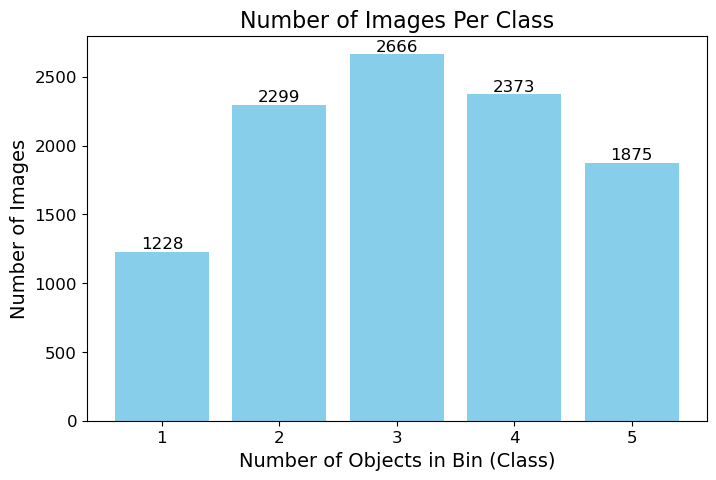

In [4]:
# Visualize the class distribution with numbers on top of bars
plt.figure(figsize=(8, 5))
bars = plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')

# Add numbers on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval}', ha='center', va='bottom', fontsize=12)

plt.title('Number of Images Per Class', fontsize=16)
plt.xlabel('Number of Objects in Bin (Class)', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Step 3: Additional EDA - Image Dimensions and Metadata

we can also analyze the dimensions of the images or any other metadata available in the dataset. Here's an example of checking the dimensions of the first few images:

In [3]:
from PIL import Image

# Analyze image dimensions for the first few images
image_dimensions = []
for class_name, files in data.items():
    for file_path in files[:5]:  # Take 5 images per class for this example
        file_name = os.path.basename(file_path).split('.')[0] + '.jpg'
        image_path = os.path.join('train_data', class_name, file_name)
        if os.path.exists(image_path):
            with Image.open(image_path) as img:
                image_dimensions.append(img.size)

# Display sample image dimensions
print("\nSample image dimensions (width, height):")
print(image_dimensions)


Sample image dimensions (width, height):
[(542, 323), (435, 558), (441, 565), (369, 253), (343, 314), (659, 639), (592, 565), (621, 696), (436, 558), (460, 353), (532, 316), (405, 276), (558, 331), (439, 563), (575, 547), (400, 274), (364, 250), (430, 380), (419, 287), (474, 365), (471, 361), (366, 553), (341, 314), (352, 531), (366, 554)]


### What Does the Image Dimension Information Tell Us?

The dimensions `(width, height)` of the images provide insight into the image sizes in the dataset. Key observations and uses:

1. **Variability in Dimensions**:

* The dataset contains images with varying resolutions (e.g., `(542, 323)` vs. `(659, 639)`).
* This variability can affect the performance of the model during training if not handled consistently.

2. **Preprocessing Requirement**:

* During data preprocessing, all images should be resized to a uniform size to maintain consistency and compatibility with the model architecture (e.g., ResNet typically requires input images of size 224x224).

3. **Storage and Performance**:

* Larger images consume more memory and processing power during training. Knowing the dimensions helps optimize memory usage.

## Displaying Sample Images Per Class

Here’s how you can display a few images from each class along with their labels:

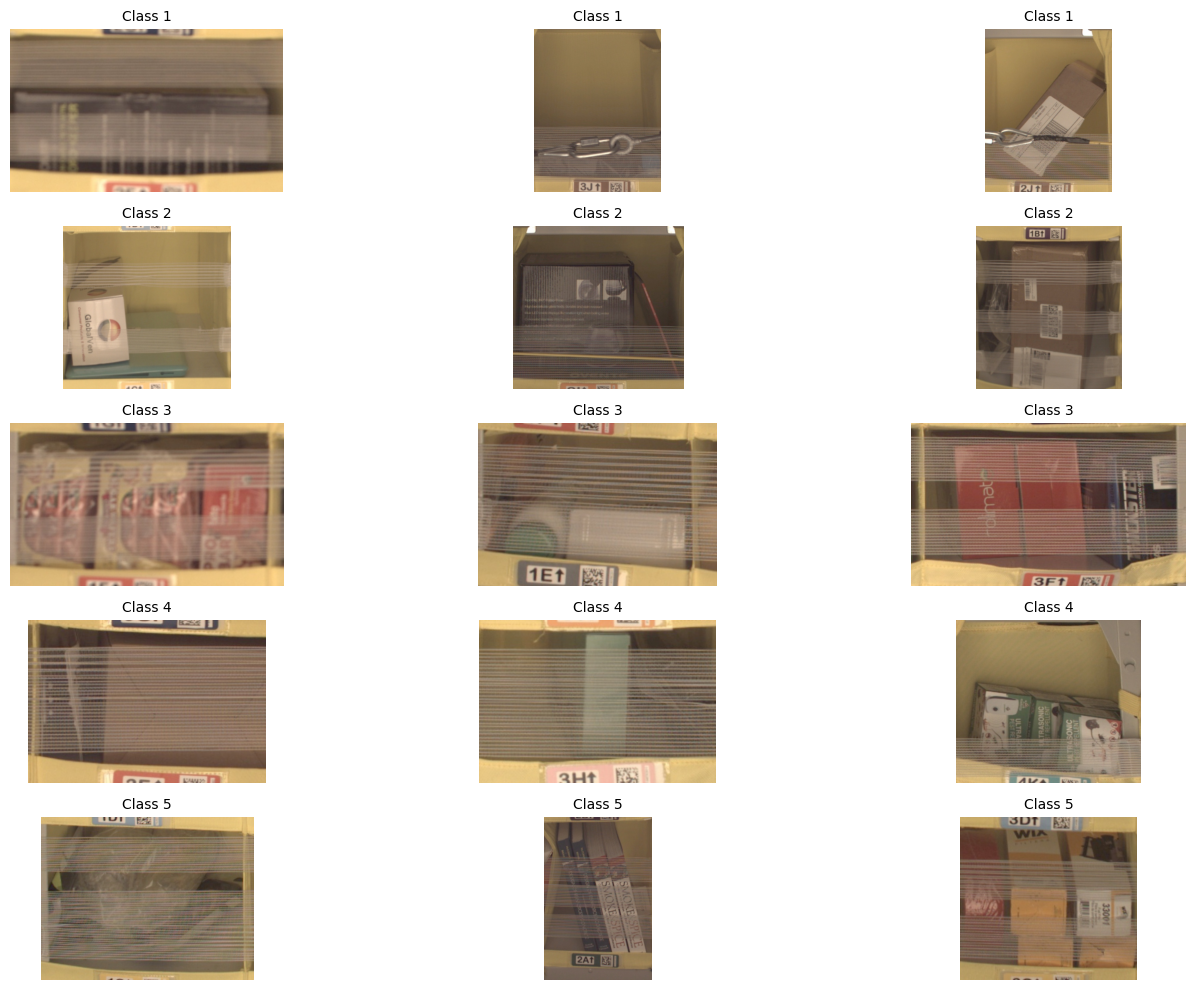

In [5]:
from PIL import Image
import matplotlib.pyplot as plt

# Function to display images from each class
def display_images_per_class(data, num_images=3):
    plt.figure(figsize=(15, 10))
    image_count = 0

    for class_name, files in data.items():
        # Display 'num_images' images per class
        for file_path in files[:num_images]:
            file_name = os.path.basename(file_path).split('.')[0] + '.jpg'
            image_path = os.path.join('train_data', class_name, file_name)
            if os.path.exists(image_path):
                with Image.open(image_path) as img:
                    image_count += 1
                    plt.subplot(len(data), num_images, image_count)
                    plt.imshow(img)
                    plt.title(f'Class {class_name}', fontsize=10)
                    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Display images per class
display_images_per_class(data, num_images=3)